<a href="https://colab.research.google.com/github/ashwinidaya/Classify_ICDPointcloud_pointnet/blob/main/2Dto3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/vedanshthakkar/3D-Object-Reconstruction.git

Cloning into '3D-Object-Reconstruction'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [ ]:
pip install git+https://github.com/daavoo/pyntcloud

  Cloning https://github.com/daavoo/pyntcloud to /tmp/pip-req-build-rddkf6yn
  Running command git clone -q https://github.com/daavoo/pyntcloud /tmp/pip-req-build-rddkf6yn
  Created wheel for pyntcloud: filename=pyntcloud-0.0.2-cp36-none-any.whl size=349134 sha256=f581aa1cb9345a85cdc31280c7a367031822a10362ec83ed72cde7744eadfa6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-706lm0h6/wheels/be/37/76/afc097c015aa7cdb2ccfc317e1ea8684c387d6b48984dd1ded
Successfully built pyntcloud


In [ ]:
pip install numpy

In [ ]:
pip install numba

In [ ]:
pip install scipy

In [ ]:
pip install pandas

In [ ]:
!source activate pyntcloud

/bin/bash: activate: No such file or directory


python3: can't open file 'Depth.py': [Errno 2] No such file or directory


In [ ]:
ls

3D-Object-Reconstruction/


In [ ]:
cd 3D-Object-Reconstruction/

/root/3D-Object-Reconstruction


In [ ]:
ls

1.jpg      Depth.py                   snapshot00.png  snapshot03.png
2.jpg      Point_Cloud_Generation.py  snapshot01.png  snapshot04.png
Depth.png  README.md                  snapshot02.png


In [ ]:
!python3  Point_Cloud_Generation.py

Traceback (most recent call last):
  File "Point_Cloud_Generation.py", line 6, in <module>
    import pptk
ModuleNotFoundError: No module named 'pptk'


In [ ]:
pip install pptk

     |████████████████████████████████| 24.8MB 36.3MB/s 


In [ ]:
!python3  Point_Cloud_Generation.py

In [ ]:
ls

1.jpg      Depth.py                   snapshot00.png  snapshot03.png
2.jpg      Point_Cloud_Generation.py  snapshot01.png  snapshot04.png
Depth.png  README.md                  snapshot02.png  Wonder.ply


In [ ]:
%cat Point_Cloud_Generation.py

import pandas as pd
import numpy as np
from pyntcloud import PyntCloud
from PIL import Image
from matplotlib import pyplot as plt
import pptk

#Get the colour image. Convert the RGB values to a DataFrame:

colourImg= Image.open("1.jpg")
colourPixels = colourImg.convert("RGB")
#Add the RGB values to the DataFrame with a little help from StackOverflow.

colourArray  = np.array(colourPixels.getdata()).reshape((colourImg.height, colourImg.width) + (3,))
indicesArray = np.moveaxis(np.indices((colourImg.height, colourImg.width)), 0, 2)
imageArray   = np.dstack((indicesArray, colourArray)).reshape((-1,5))
df = pd.DataFrame(imageArray, columns=["x", "y", "red","green","blue"])
#Open the depth-map as a greyscale image. Convert it into an array of depths. Add it to the DataFrame

depthImg = Image.open('Depth.png').convert('L')
depthArray = np.array(depthImg.getdata())
df.insert(loc=2, column='z', value=depthArray)
#Convert it to a Point Cloud and display it:

df[['x','y','z']] = df[['x','y','z']

In [ ]:
%cat Wonder.ply

ply
format ascii 1.0
element vertex 191600
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
0.0 0.0 30.0 155 169 169
0.0 1.0 30.0 155 169 169
0.0 2.0 30.0 155 169 169
0.0 3.0 30.0 155 169 169
0.0 4.0 30.0 155 169 169
0.0 5.0 30.0 155 169 169
0.0 6.0 30.0 155 169 169
0.0 7.0 30.0 155 169 169
0.0 8.0 30.0 153 167 167
0.0 9.0 30.0 153 167 167
0.0 10.0 30.0 154 168 168
0.0 11.0 30.0 154 168 168
0.0 12.0 30.0 154 168 168
0.0 13.0 30.0 154 168 168
0.0 14.0 30.0 153 167 167
0.0 15.0 30.0 153 167 167
0.0 16.0 30.0 156 170 170
0.0 17.0 30.0 155 169 169
0.0 18.0 30.0 155 169 169
0.0 19.0 30.0 155 169 169
0.0 20.0 30.0 154 168 168
0.0 21.0 30.0 154 168 168
0.0 22.0 30.0 154 168 168
0.0 23.0 30.0 154 168 168
0.0 24.0 30.0 153 167 167
0.0 25.0 30.0 153 167 167
0.0 26.0 30.0 153 167 167
0.0 27.0 30.0 153 167 167
0.0 28.0 30.0 153 167 167
0.0 29.0 30.0 154 168 168
0.0 30.0 30.0 154 168 168
0.0 31.0 30.0 155 169 169
0.0 32.0 30.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2.0 283.0 77.0 115 75 63
232.0 284.0 77.0 112 72 60
232.0 285.0 30.0 110 70 58
232.0 286.0 30.0 111 71 59
232.0 287.0 30.0 113 73 61
232.0 288.0 30.0 113 73 61
232.0 289.0 30.0 112 72 60
232.0 290.0 30.0 109 69 57
232.0 291.0 30.0 107 67 55
232.0 292.0 30.0 105 65 53
232.0 293.0 30.0 105 65 53
232.0 294.0 30.0 105 65 53
232.0 295.0 69.0 105 65 53
232.0 296.0 69.0 105 65 53
232.0 297.0 70.0 105 65 53
232.0 298.0 70.0 105 65 53
232.0 299.0 72.0 104 64 52
232.0 300.0 73.0 104 64 52
232.0 301.0 74.0 103 63 51
232.0 302.0 76.0 103 63 51
232.0 303.0 76.0 102 62 50
232.0 304.0 77.0 104 66 55
232.0 305.0 76.0 104 66 55
232.0 306.0 76.0 104 66 53
232.0 307.0 30.0 104 66 53
232.0 308.0 30.0 102 64 51
232.0 309.0 30.0 100 62 49
232.0 310.0 30.0 97 59 46
232.0 311.0 30.0 95 59 47
232.0 312.0 30.0 96 60 48
232.0 313.0 73.0 92 58 48
232.0 314.0 72.0 92 58 48
232.0 315.0 72.0 93 60 51
232.0 316.0 70.0 96 63 56
232.0 317.0 68.0 93 63 55
232.0 318.0 66.0 87 56 51
232.0 319.0 66.0 80 51 45
232.0 320.0 6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from IPython.display import Image, display
display(Image('./3D-Object-Reconstruction/1.jpg'))


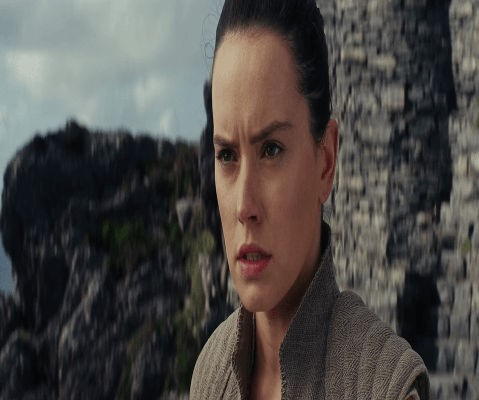

In [ ]:
from IPython.display import Image
Image('1.jpg')

In [ ]:
!pip install matplotlib
ptCloud = pcread('Wonder.ply');
pcshow(ptCloud);

NameError: ignored

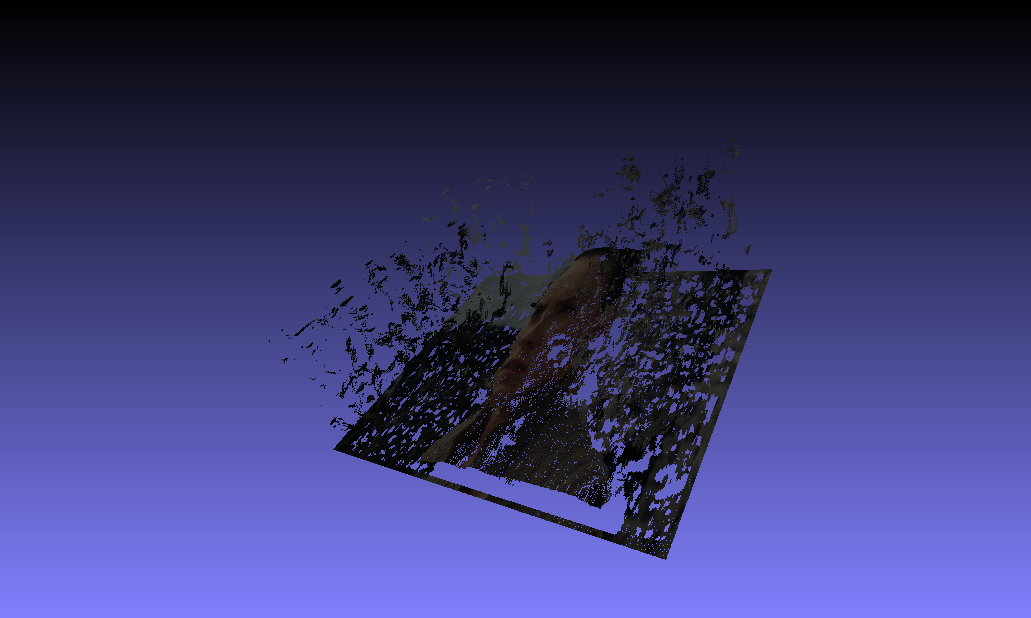

In [ ]:
Image('snapshot02.png')

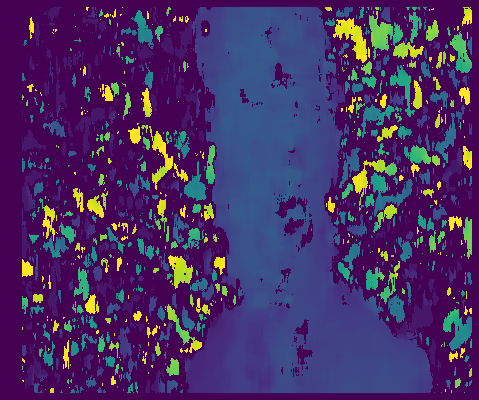

In [ ]:
Image('Depth.png')